In [1]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dbscan_display import read_results,typenames,nametypes

/home/price-jones/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
print(typenames)

{'spec': 'spectra', 'abun': 'abundances', 'reda': 'reduced abundances', 'toph': 'tophat windows', 'wind': 'windows', 'prin': '10 principal components', 'prin2': '02 principal components', 'prin5': '05 principal components', 'prin10': '10 principal components', 'prin20': '20 principal components', 'prin30': '30 principal components', 'prin50': '50 principal components', 'tabn': 'ting abundances', 'trda': 'reduced ting abundances', 'labn': 'leung abundances', 'lrda': 'reduced leung abundances'}


In [4]:
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = '2018-08-27.23.06.28.732683')#'2018-08-14.20.35.09.910397')

In [5]:
dir(d)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'case',
 'check_known',
 'dtype',
 'found_frac',
 'generate_average_stats',
 'read_base_data',
 'read_dtype_data',
 'read_run_data',
 'timestamp']

In [6]:
import matplotlib

In [7]:
colors={'spec':'#0C0C0C',
        'toph':'#494949',
        'prin30':'#AAAAAA',
        'abun':'#0C0C0C',
        'tabn':'#AAAAAA',
        'labn':'#494949',
        'reda':'b',
        'trda':'m'}

shapes={'spec':'v',
        'toph':'s',
        'prin30':'o',
        'abun':'p',
        'tabn':'^',
        'labn':'d',
        'reda':'o',
        'trda':'o'}

sizes={'spec':20,
        'toph':20,
        'prin30':20,
        'abun':20,
        'tabn':20,
        'reda':20,
        'trda':20,
        'labn':20}

alphas={'spec':0.7,
        'toph':0.7,
        'prin30':0.7,
        'abun':0.7,
        'tabn':0.7,
        'labn':0.7}

names={'spec':'unmodified',
       'toph':'binary mask',
       'prin30':'principal components',
       'abun':'conservative',
       'tabn':'theoretical',
       'labn':'optimistic'}

### For only epsilon variation

In [8]:
d.read_base_data()
if not d.allbad:
    d.generate_average_stats(testnum=10,testsize=15,testeff=0.70,testcom=0.70,iters=100,minmem=15,checkcls=10,checkinds=[9807,9806,9804])

spectra
abundances
reduced abundances
tophat windows
windows
10 principal components
02 principal components
05 principal components
20 principal components
30 principal components
50 principal components
ting abundances
reduced ting abundances
leung abundances
reduced leung abundances


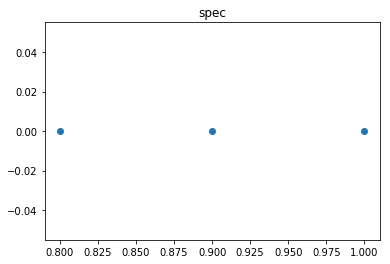

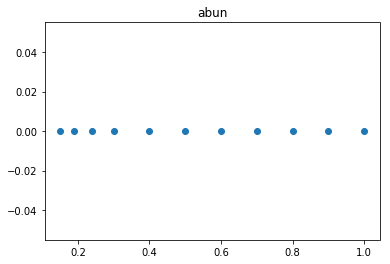

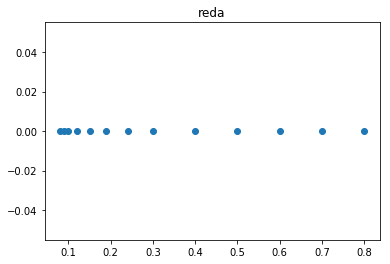

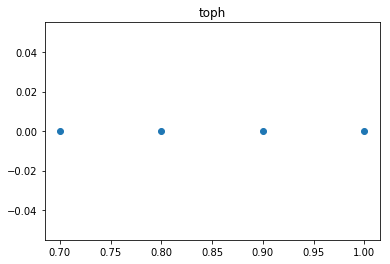

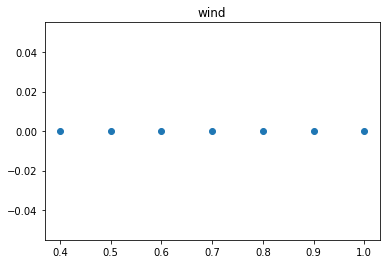

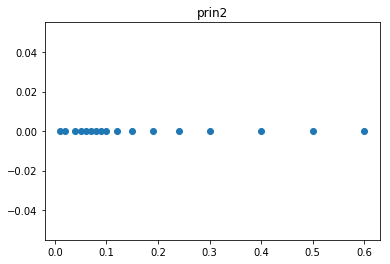

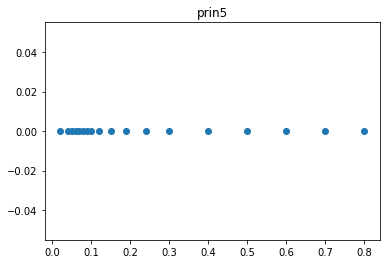

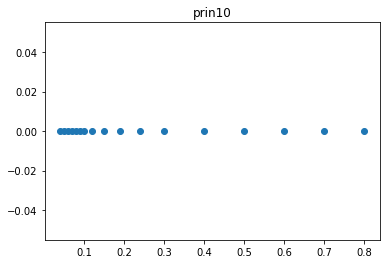

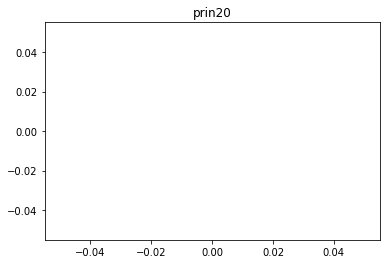

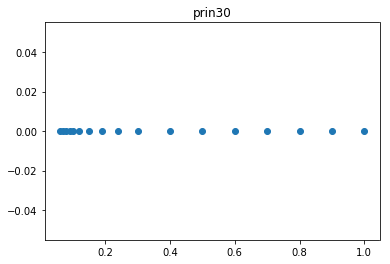

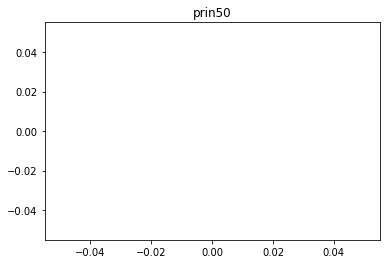

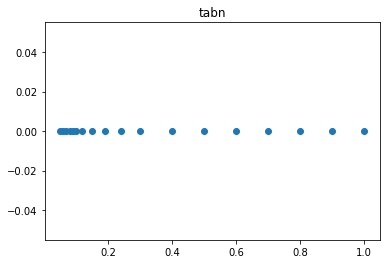

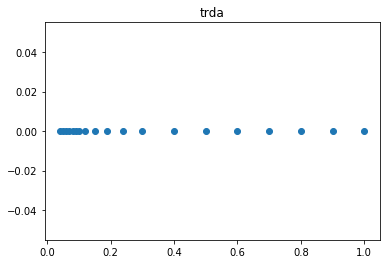

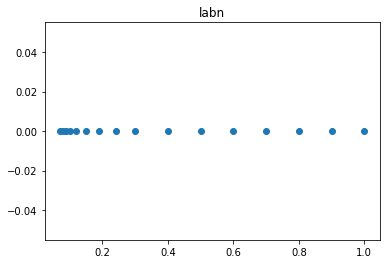

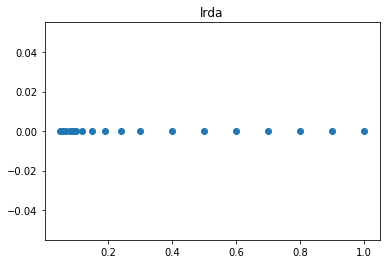

In [9]:
keys = ['spec','prin30','abun','tabn','labn']
keys = list(typenames.keys())
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        plt.figure()
        params = ss['params']
        mask = ss['numc'] > 0.5
        eps = np.array([float(i.split(', ')[0]) for i in params])
        plt.plot(eps[mask],ss['knowns'][mask],marker='o',lw=0)
        plt.title(key)

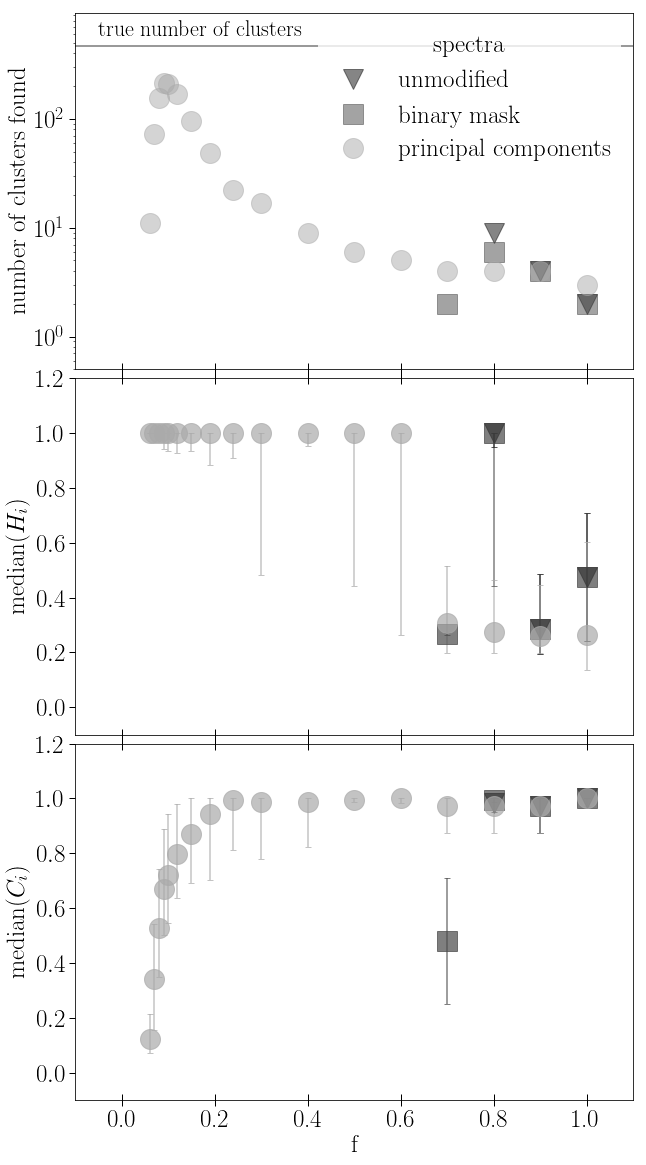

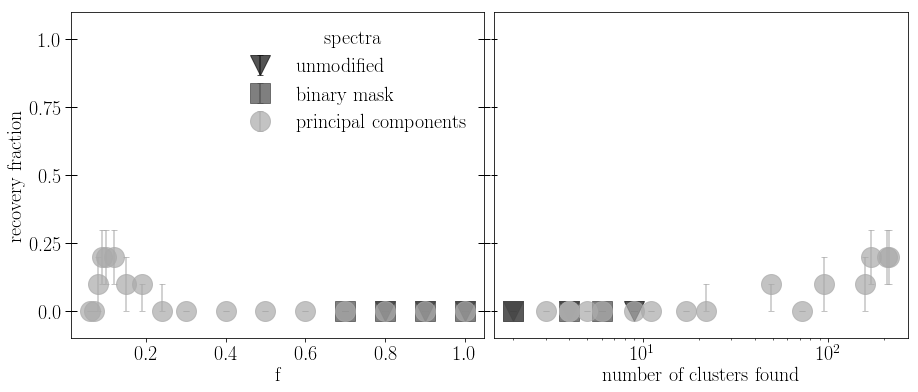

In [10]:
keys = list(typenames.keys())
keys = ['spec','toph','prin30']
legendtitle='spectra'
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
#             plt.figure(2,figsize=(10,8))
#             ax = plt.subplot(111)
#             ax.set_yscale("log")
#             if key == keys[0]:
#                 plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
#             plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
#             plt.xlabel('$\epsilon$',fontsize=30)
#             plt.ylabel('number of clusters found')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(10,20))
            ax = plt.subplot(311)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4)#,label='true number\nof clusters')
                plt.text(-0.05,ss['tnumc'][0]+0.2*ss['tnumc'][0],'true number of clusters',fontsize=22)
                #plt.axvline(-1,color='k',alpha=0.5)#,label='maximum recovery\nfraction colored\nby data type',ls='--')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of clusters found')
            fticks = np.round(np.arange(0,1.2,0.2),1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
            plt.ylim(0.5,2.0*ss['tnumc'][0])
            plt.xlim(-0.1,1.1)
            legend = plt.legend(loc='best',title=legendtitle)
            legend.get_frame().set_linewidth(0.0)
            plt.subplot(312)
            plt.ylabel('median($H_i$)')
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
                #plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #legend = plt.legend(loc='best')
            #legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.ylabel('median($C_i$)')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xlabel('f')
            plt.xticks(fticks,fticks)
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.subplots_adjust(hspace=0.025)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  20 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.figure(2,figsize=(15,6))
            plt.subplot(121)
            plt.ylabel('recovery fraction')
            plt.xlabel('f')
            #if key ==keys[0]:
            #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
            plt.ylim(-0.1,1.1)
            rticks = np.arange(0,1.25,0.25)
            plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
            plt.yticks(rticks,rticks)
            legend = plt.legend(loc='best',title=legendtitle)
            legend.get_frame().set_linewidth(0.0)
            ax = plt.subplot(122)
            ax.set_xscale("log")
            #if key ==keys[0]:
            #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
            plt.yticks(rticks,['']*len(rticks))
            plt.ylim(-0.1,1.1)
            plt.xlabel('number of clusters found')
            plt.subplots_adjust(wspace=0.025)
plt.figure(2)
plt.savefig('recv_spec_5e4.pdf')
plt.figure(1)
plt.savefig('stats_spec_5e4.pdf')
            

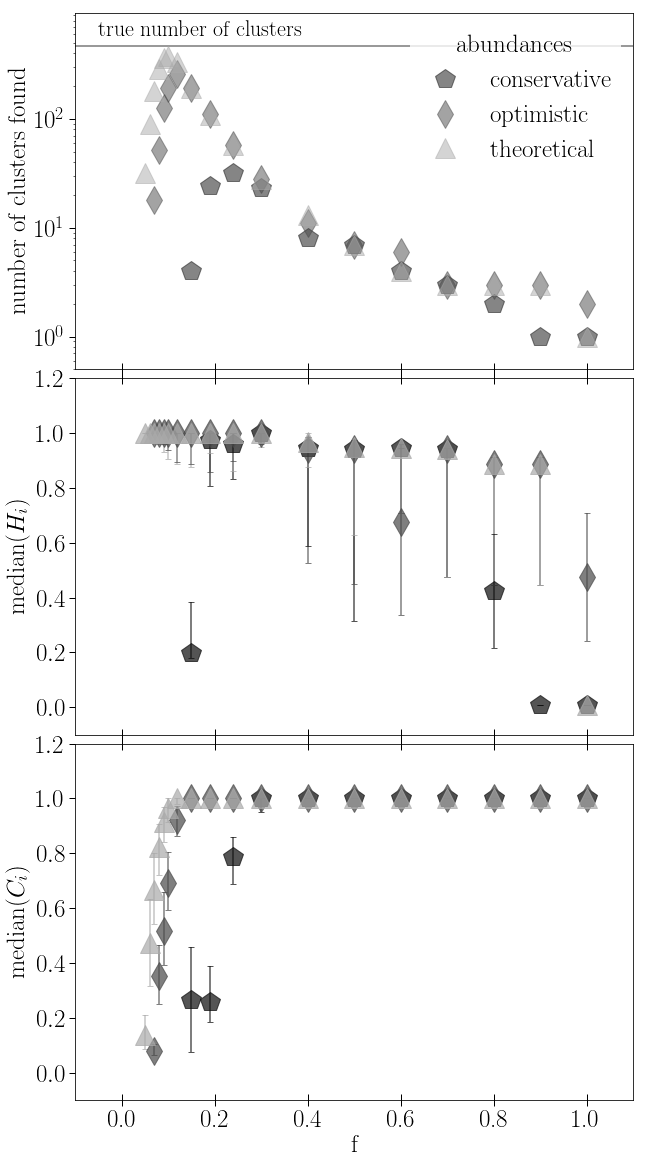

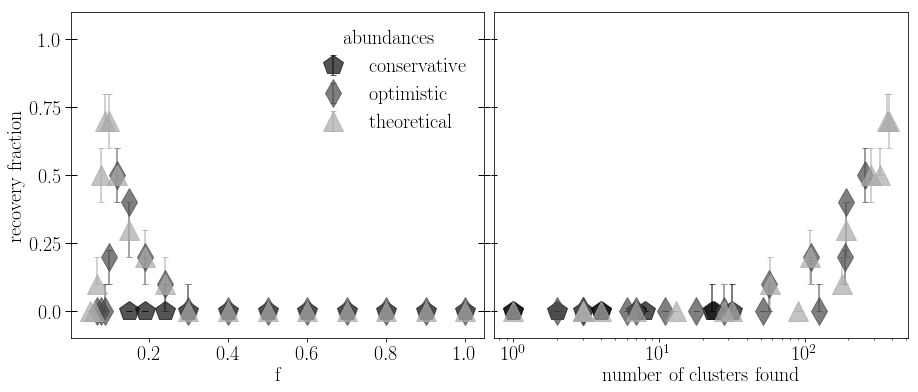

In [11]:
keys = list(typenames.keys())
keys = ['abun','labn','tabn']#,'reda','trda']
legendtitle='abundances'
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
#             plt.figure(2,figsize=(10,8))
#             ax = plt.subplot(111)
#             ax.set_yscale("log")
#             if key == keys[0]:
#                 plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
#             plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
#             plt.xlabel('$\epsilon$',fontsize=30)
#             plt.ylabel('number of clusters found')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(10,20))
            ax = plt.subplot(311)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4)#,label='true number\nof clusters')
                plt.text(-0.05,ss['tnumc'][0]+0.2*ss['tnumc'][0],'true number of clusters',fontsize=22)
                #plt.axvline(-1,color='k',alpha=0.5)#,label='maximum recovery\nfraction colored\nby data type',ls='--')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of clusters found')
            fticks = np.round(np.arange(0,1.2,0.2),1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
            plt.ylim(0.5,2.0*ss['tnumc'][0])
            plt.xlim(-0.1,1.1)
            legend = plt.legend(loc='best',title=legendtitle)
            legend.get_frame().set_linewidth(0.0)
            plt.subplot(312)
            plt.ylabel('median($H_i$)')
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
                #plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #legend = plt.legend(loc='best')
            #legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.ylabel('median($C_i$)')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xlabel('f')
            plt.xticks(fticks,fticks)
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.subplots_adjust(hspace=0.025)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  20 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.figure(2,figsize=(15,6))
            plt.subplot(121)
            plt.ylabel('recovery fraction')
            plt.xlabel('f')
            #if key ==keys[0]:
            #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
            plt.ylim(-0.1,1.1)
            rticks = np.arange(0,1.25,0.25)
            plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
            plt.yticks(rticks,rticks)
            legend = plt.legend(loc='best',title=legendtitle)
            legend.get_frame().set_linewidth(0.0)
            ax = plt.subplot(122)
            ax.set_xscale("log")
            #if key ==keys[0]:
            #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
            plt.yticks(rticks,['']*len(rticks))
            plt.ylim(-0.1,1.1)
            plt.xlabel('number of clusters found')
            plt.subplots_adjust(wspace=0.025)
plt.figure(2)
plt.savefig('recv_abun_5e4.pdf')
plt.figure(1)
plt.savefig('stats_abun_5e4.pdf')

In [12]:
import h5py

In [13]:
c = h5py.File('../PC12.hdf5','r')
names = ['vec2','vec5','vec10','vec20','vec50','vec1000','vec7214']

In [14]:
explained = 0.9
varatio = c['vec7214'].attrs['varratio']
a = np.where(np.cumsum(varatio)>explained)[0][0]
print('you need {0} PCs to exceed {1}% explained variance'.format(a+1,explained*100))

you need 2298 PCs to exceed 90.0% explained variance


In [15]:
vecs = 30
print('if you have {0} PCs, you can explain {1}% of the variance'.format(vecs,np.cumsum(varatio)[vecs-1]))

if you have 30 PCs, you can explain 0.7092947908025158% of the variance


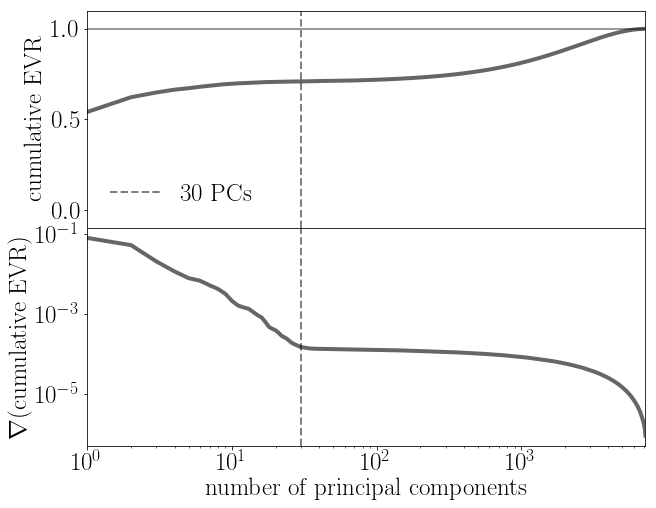

In [16]:
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25 # Tune this according to personal preference
        }
matplotlib.rc('font',**font)
plt.rc('text', usetex=True)
mark = 30
for n,name in enumerate(names):
    eigvecs = c[name]
    eigvals = c[name].attrs['eigvals']
    varatio = c[name].attrs['varratio']
    plt.figure(1,figsize=(10,8))
    plt.subplot(211)
    if n == len(names)-1:
        plt.axhline(1,color='k',ls='-',lw=2,alpha=0.4)
        plt.axvline(mark,color='gray',ls='--',lw=2,label='{0} PCs'.format(mark))
        plt.semilogx(np.arange(1,len(varatio)+1,1),np.cumsum(varatio),lw=4,color='k',alpha=0.6)
        plt.ylim(-0.1,1.1)
        plt.xlim(0,7214)
        plt.xticks([])
        #plt.xlabel('number of principal components')
        plt.ylabel('cumulative EVR')
        legend = plt.legend(loc='best')
        legend.get_frame().set_linewidth(0.0)
    plt.subplot(212) 
    if n == len(names)-1:
        plt.axvline(mark,color='gray',ls='--',lw=2)
        plt.loglog(np.arange(1,len(varatio)+1,1),np.gradient(np.cumsum(varatio)),lw=4,color='k',alpha=0.6)
        plt.xlabel('number of principal components')
        plt.ylabel(r'$\nabla$(cumulative EVR)')
        plt.xlim(0,7214)
    plt.subplots_adjust(hspace=0.0)
plt.figure(1)
plt.savefig('principal_components.pdf')

In [17]:
rawdata = h5py.File('/home/price-jones/TAGSPACE/synthetic_clusters/centergen_choosestruct/clustering_data.hdf5')

In [18]:
stamp = '2018-08-27.23.06.28.732683'#'2018-08-22.04.01.21.877459'
centers = rawdata['center_abundances_wOCs_{0}'.format(stamp)]
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = stamp)
d.read_base_data()

In [19]:
elems = (centers.attrs['elemnames']).astype('U2')
feind = np.where(elems=='Fe')[0][0]

In [20]:
fecenters = np.zeros(centers.shape)
fecenters[:,0] = centers[:,feind]
els = np.delete(elems,feind)
for col in range(len(els)):
    match = np.where(elems==els[col])[0][0]
    fecenters[:,col+1] = centers[:,match]
    fecenters[:,col+1] -= centers[:,feind]

In [21]:
fecenters.shape

(9808, 15)

In [22]:
from matplotlib.colors import LogNorm
default_cmap='viridis'
fs = 12
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  fs
}

matplotlib.rc('font',**font)
def histogram2d(fig,ax,x,y,bins=100,clabel=False,vmin=0,vmax=110,norm='lin',default_cmap=default_cmap):
    """
    Create a 2D histogram of data represented by the two dimensions x and y
    
    fig:      Figure to plot in
    ax:       Subplot object to plot in
    x:        Array of data values in 'x'
    y:        Array of data values in 'y'
    bins:     Number of bins in which to divide each axis
    clabel:   Label for the colourbar - no colourbar is plotted if this is not given
    vmin:     Minimum value of the histogram
    vmax:     Maximum value of the histogram
    
    """
    # Create histogram
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    # Mask where bins are empty
    Hmasked = np.ma.masked_where(H==0,H)
    # Plot histogram
    if norm == 'lin':
        im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           vmin=vmin,vmax=vmax)
    elif norm == 'log':
            im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           norm=LogNorm(vmin=vmin,vmax=vmax))
    # If colourbar is desired, plot and label it
    if clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.set_label(label=clabel,fontsize=fs)
        cbar.ax.tick_params(labelsize=fs)
    elif not clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.ax.tick_params(labelsize=fs)

In [86]:
d.read_run_data(eps=0.1,min_sample=3,update=True,datatype='prin30')

matchtlabs = d.matchtlabs
ecut = 0.8
ccut = 0.8
sizemin=0
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)

IndexError: index 1 is out of bounds for axis 0 with size 1

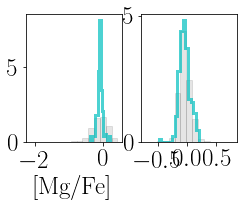

In [87]:
plt.figure(figsize=(10,8))
elembins=15
norm=True
for elem in range(fecenters.shape[1]):
    plt.subplot(3,5,elem+1)
    plt.hist(fecenters[:,elem],bins=elembins,alpha=0.1,edgecolor='k',color='k',normed=norm)
    plt.hist(fecenters[matchtlabs][success][:,elem],bins=elembins,histtype='step',alpha=0.7,edgecolor='c',color='c',normed=norm,lw=3)
    #plt.hist(fecenters[matchtlabs][bad][:,elem],bins=elembins,histtype='step',alpha=0.7,edgecolor='r',color='r',normed=norm,lw=3)
    if elems[elem] != 'Fe':
        plt.xlabel('[{0}/Fe]'.format(elems[elem]))
    else:
        plt.xlabel('[{0}/H]'.format(elems[elem]))
plt.tight_layout()

In [194]:
d.read_run_data(eps=0.15,min_sample=3,update=True,datatype='prin30')

matchtlabs = d.matchtlabs
ecut = 0.8
ccut = 0.8
sizemin=0
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)

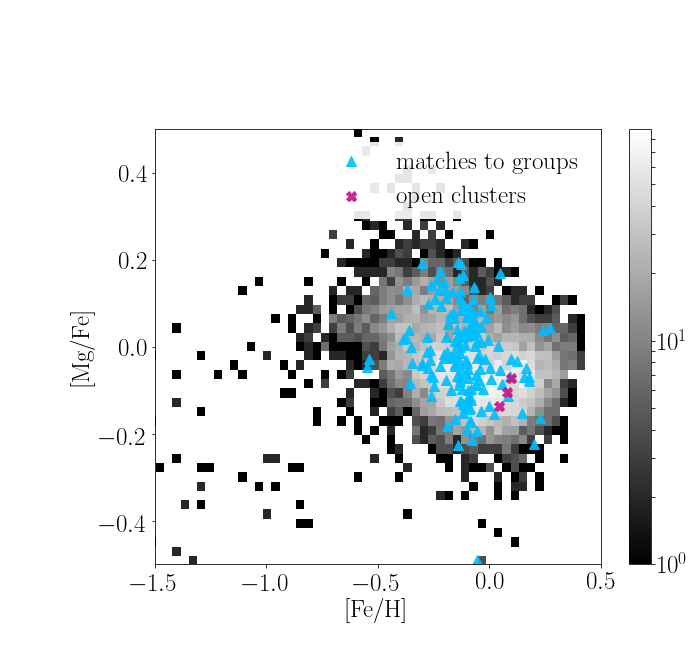

In [195]:
ndim = 15
ecut = 0.8
ccut = 0.8
sizemin = 15
nbins = 20
mask = d.tsize>sizemin
#mask= [True]*len(fes)
inds = [9807,9806,9804]
elems = np.array(['Mg'])
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25
}
ms = 10
matplotlib.rc('font',**font)
for elem in elems:
    if elem != 'Fe':
        mgind = np.where(elems==elem)[0][0]
        fes = (centers[:,feind])
        mgs = (centers[:,mgind]-centers[:,feind])
        fig = plt.figure(1,figsize=(10,8))
        ax = plt.subplot(111)
        #if len(fes[mask])<200:
        #    plt.plot(fes[mask],mgs[mask],'.',color='k',alpha=0.6)
        #elif len(fes[mask])>200:
        #    histogram2d(fig,ax,fes[mask],mgs[mask],norm='log',bins=50,vmin=1,vmax=50,default_cmap='gray')
        counts,ybins,xbins = np.histogram2d(mgs,fes,bins=50)
        levels = np.logspace(1,np.log10(150),15)
        plt.figure(1)
        H,y,x,im = plt.hist2d(fes,mgs,bins=70,norm=LogNorm(),cmap='gray')
        plt.colorbar(im)
        #plt.contourf(counts,levels=im.levels,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],norm=LogNorm(vmin=10,vmax=1e3),linewidths=3,cmap='gray')
        labs = d.matchtlabs[success]
        plt.plot(fes[labs],mgs[labs],'^',color='deepskyblue',alpha=0.9,markersize=ms,label='matches to groups')
        for ind in inds:
            match = np.where(labs==ind)
            if len(match[0]) > 0:
                plt.plot(fes[match[0][0]],mgs[match[0][0]],'P',color='lightgreen',markersize=ms)
            elif len(match[0])==0:
                if ind == inds[0]:
                    plt.plot(fes[ind],mgs[ind],'X',color='mediumvioletred',markersize=ms,label='open clusters',alpha=0.9)
                elif ind != inds[0]:
                    plt.plot(fes[ind],mgs[ind],'X',color='mediumvioletred',markersize=ms,alpha=0.9)
        legend = plt.legend(loc='best')
        legend.get_frame().set_linewidth(0.0)
        legend.get_frame().set_alpha(0.9)
        plt.ylim(-0.5,0.5)
        plt.xlim(-1.5,0.5)
        plt.xlabel('[Fe/H]')
        plt.ylabel('[{0}/Fe]'.format(elem))
plt.savefig('chemspace_dist.pdf')

In [26]:
fes[labs],mgs[labs]

(array([ 1.02622323e-01, -3.03770781e-01, -3.72460663e-01, -2.86807567e-02,
        -5.69964573e-02,  9.42062587e-04, -1.89074114e-01, -3.85790616e-02,
        -1.23595044e-01, -2.83218294e-01,  1.68751448e-01, -8.73403028e-02,
        -2.20365256e-01, -6.55045435e-02, -3.48266155e-01, -3.49887848e-01,
        -1.34215248e+00, -1.66492015e-01,  1.00292563e-01, -4.58263382e-02,
        -1.82552040e-02, -1.87470436e-01, -2.75314301e-01,  1.46219805e-01,
        -1.48866966e-01, -1.94127768e-01, -2.97783941e-01, -1.03974625e-01,
        -2.57301003e-01, -5.49523830e-01, -8.07999745e-02,  7.76060224e-02,
        -4.41821039e-01, -5.39815202e-02, -8.73481482e-02, -4.74251121e-01,
        -1.28467381e-01, -2.51945108e-03, -1.19226433e-01,  1.05936885e-01,
        -1.43115744e-02, -3.27427775e-01, -3.80928129e-01, -1.41706914e-02,
        -2.03835994e-01, -4.42728221e-01, -1.81301951e-01,  4.89758551e-02,
         1.25406265e-01, -9.56532359e-02, -1.21515244e-02, -5.97250722e-02,
        -1.3

In [243]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, xi, yi,bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""
    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[-1:fes.max():xbins, 
                      mgs.min():mgs.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_points = np.vstack([yi,xi]).T
    xy_train  = np.vstack([y, x]).T
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    zpts = np.exp(kde_skl.score_samples(xy_points))
    return xx, yy, np.reshape(z, xx.shape),zpts



In [202]:
xbins=100j
ybins=100j
bandwidth=0.01
kernel = 'gaussian'
ecut = 0.8
ccut = 0.8
felim = -1
sizemin=15

(6+0j) (6+0j) 0.12921715145015022
(56+0j) (52+0j) 0.025553621736558427


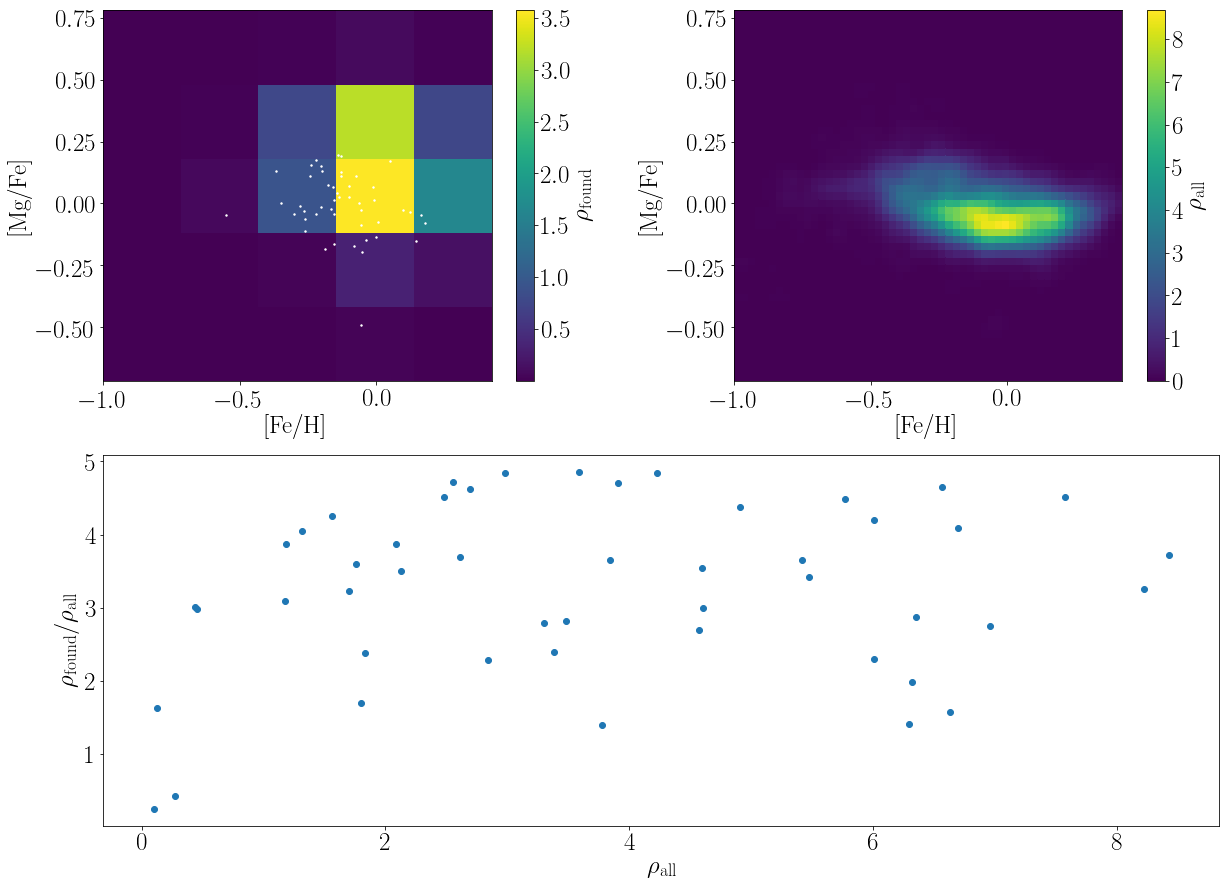

In [253]:
d.read_run_data(eps=0.15,min_sample=3,update=True,datatype='prin30')
matchtlabs = d.matchtlabs

success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)
labs = d.matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('principal_components_mgfedensity.pdf')

(2+0j) (2+0j) 0.37954129623868677
(56+0j) (52+0j) 0.025553621736558427


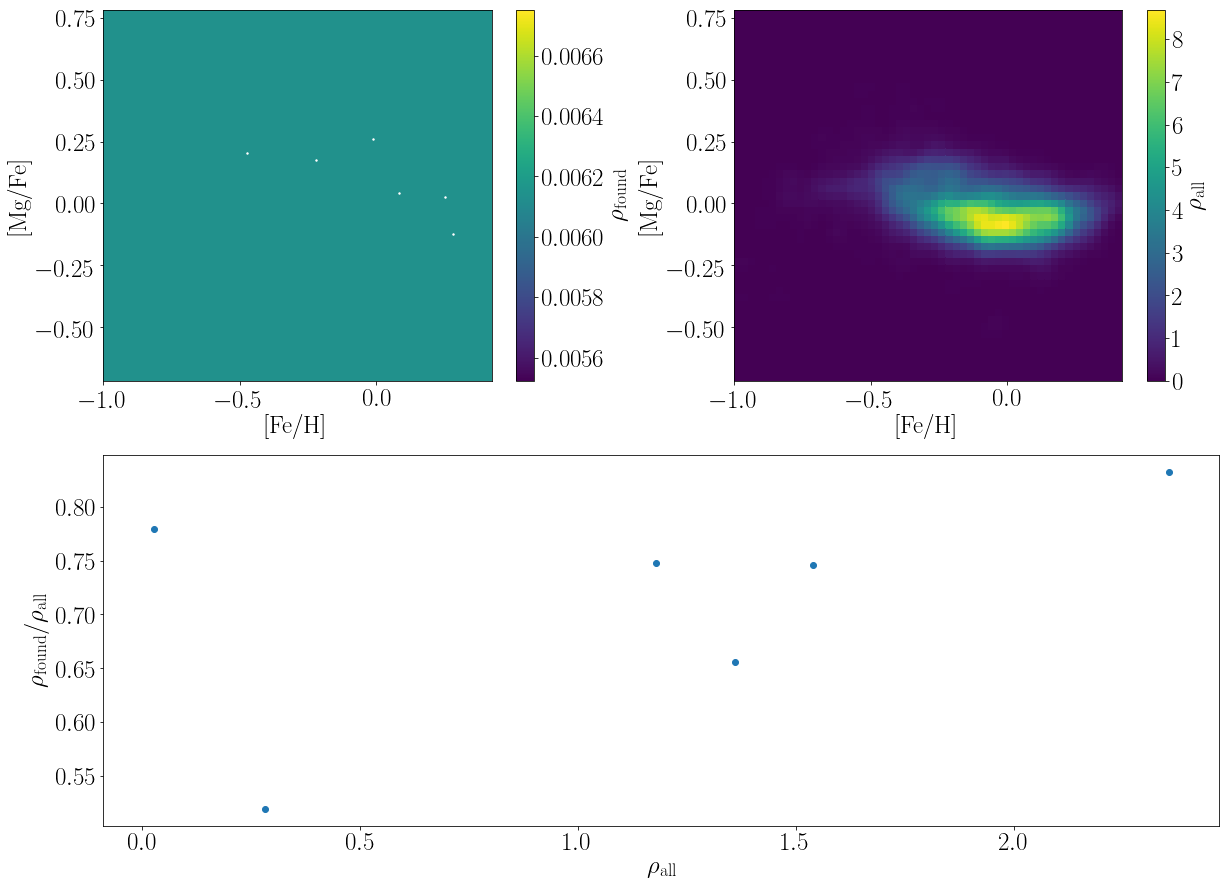

In [254]:
d.read_run_data(eps=0.8,min_sample=3,update=True,datatype='spec')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)
labs = d.matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('spectra_mgfedensity.pdf')

(13+0j) (8+0j) 0.09670338551850753
(56+0j) (52+0j) 0.025553621736558427


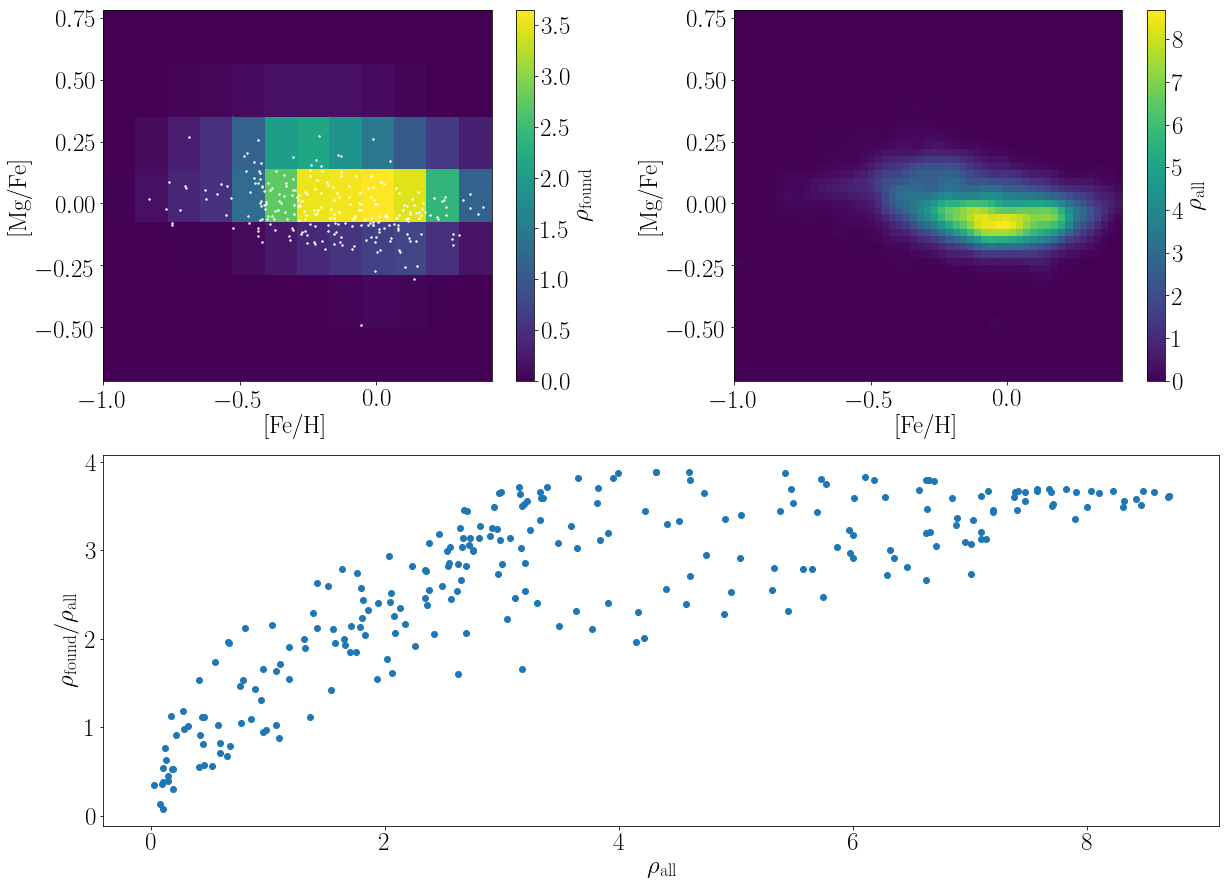

In [255]:
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)
labs = d.matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('ting_abundances_mgfedensity.pdf')

(12+0j) (8+0j) 0.107089067553733
(56+0j) (52+0j) 0.025553621736558427


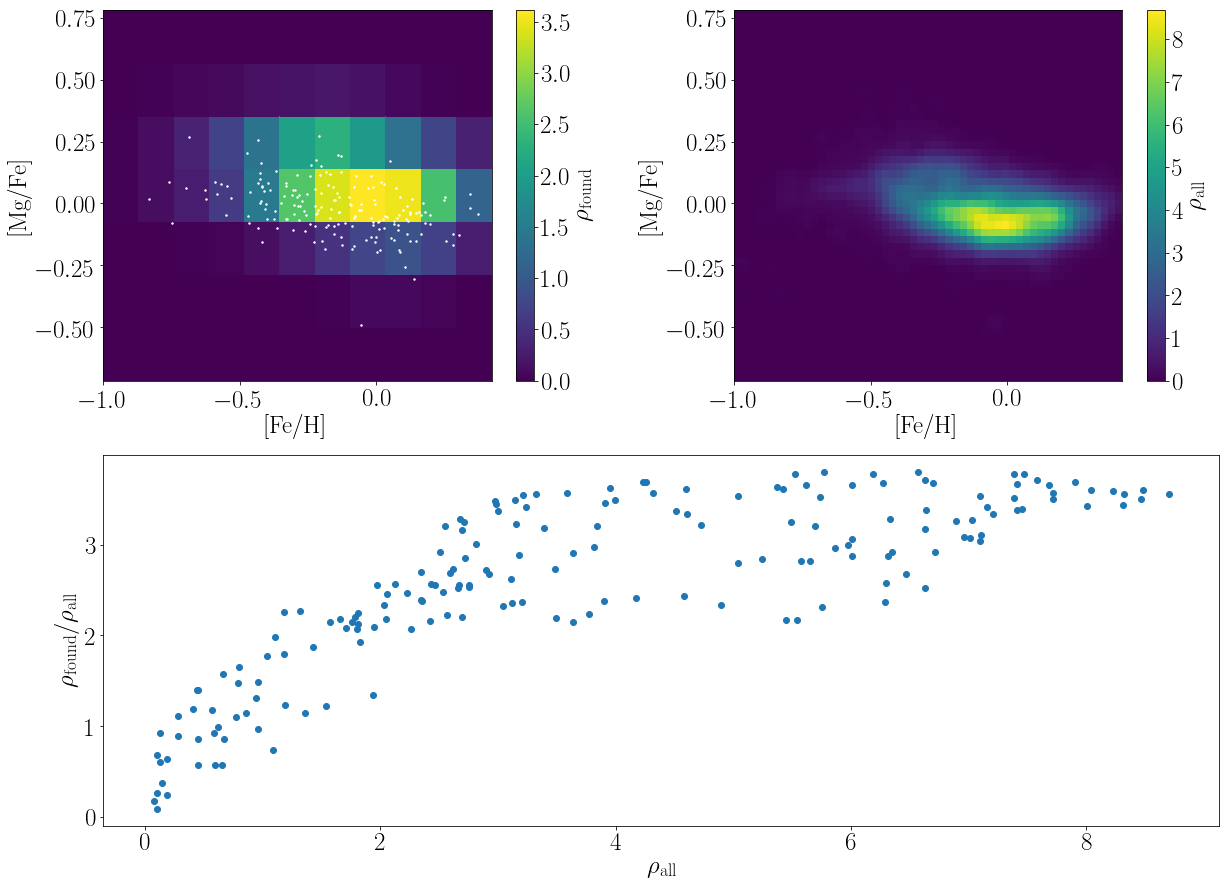

In [256]:
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)
labs = d.matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('leung_abundances_mgfedensity.pdf')

(4+0j) (3+0j) 0.31083309820699073
(56+0j) (52+0j) 0.025553621736558427


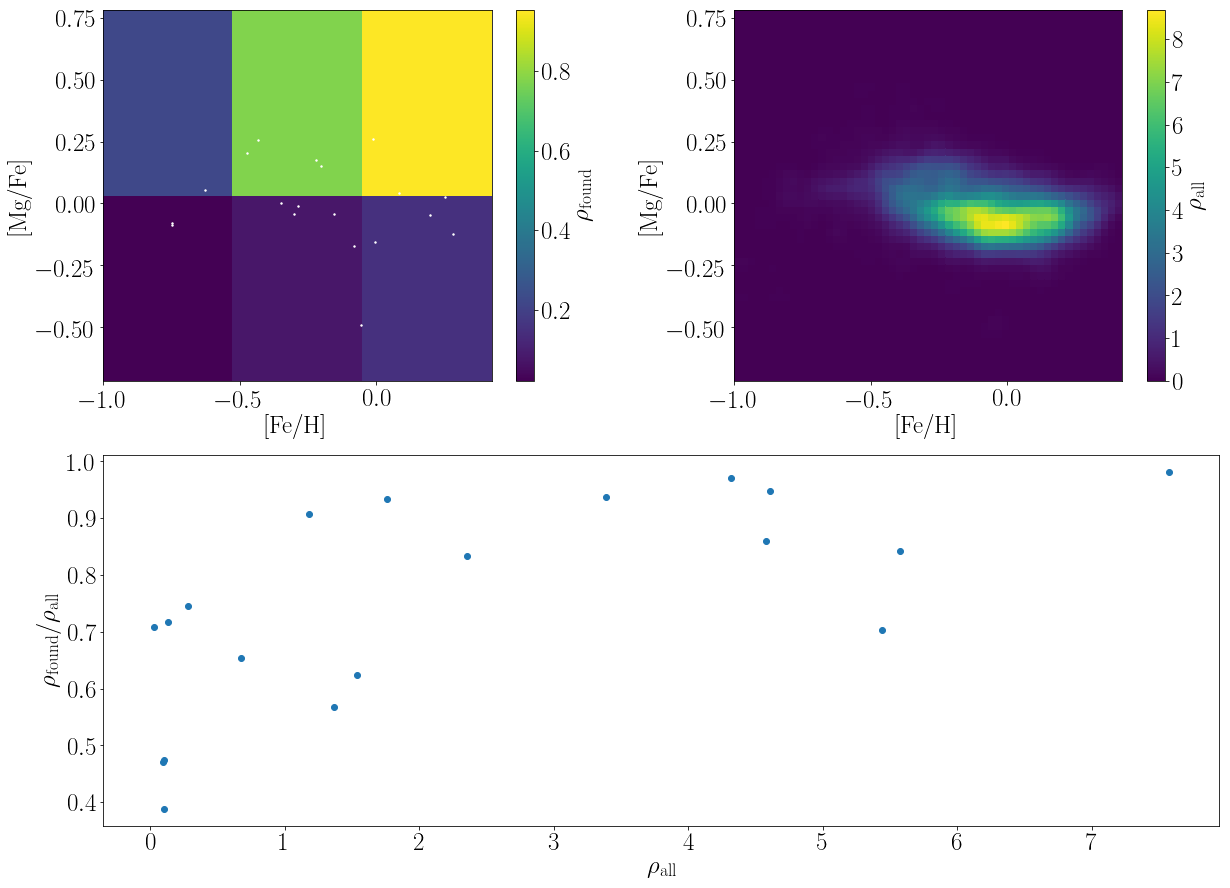

In [257]:
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)
labs = d.matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('holtzman_abundances_mgfedensity.pdf')

In [142]:
d.tsil[9804]

0.39528710429771946

In [258]:
d.tsil[9806]

0.2863565620798861

In [259]:
d.tsil[9807]

0.3429079115809578

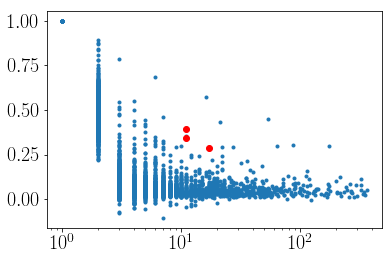

In [265]:
plt.semilogx(d.tsize,d.tsil,'.')
plt.semilogx(d.tsize[9804],d.tsil[9804],'o',color='r')
plt.semilogx(d.tsize[9806],d.tsil[9806],'o',color='r')
plt.semilogx(d.tsize[9807],d.tsil[9807],'o',color='r')

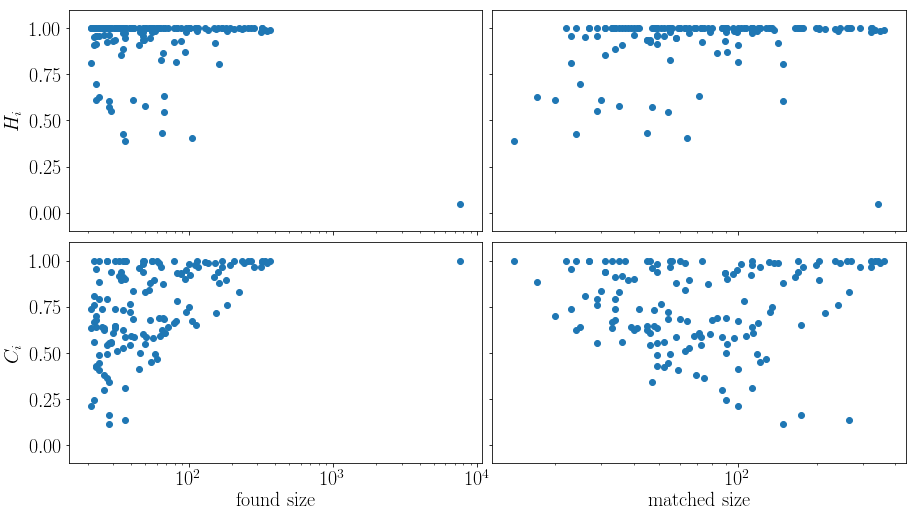

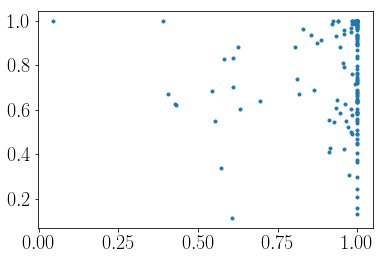

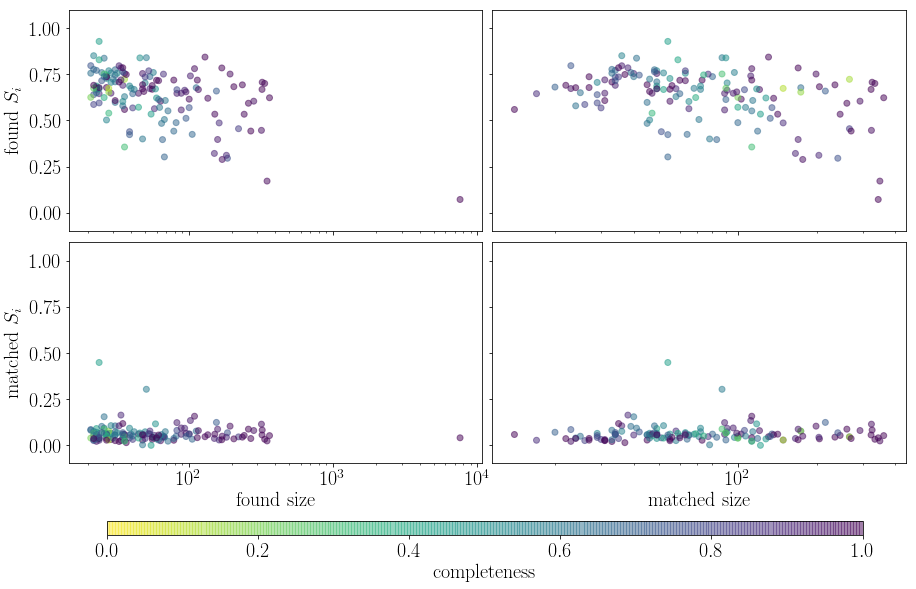

In [266]:
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  20
}
cmap = 'viridis_r'#'coolwarm'
sizelim = 20
mask = d.fsize > sizelim
fsizes = np.sort(d.fsize[mask])
matplotlib.rc('font',**font)
d.read_run_data(eps=0.1,min_sample=3,update=True,datatype='prin30')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
ax1.set_xscale('log')
sc = ax1.scatter(d.fsize[mask],d.eff[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax1.set_ylabel('$H_i$')
ax1.set_ylim(-0.1,1.1)
ax2.set_xscale('log')
sc = ax2.scatter(d.msize[mask],d.eff[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax2.set_ylim(-0.1,1.1)
ax3.set_xscale('log')
sc = ax3.scatter(d.fsize[mask],d.com[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax3.set_ylabel('$C_i$')
ax3.set_xlabel('found size')
ax3.set_ylim(-0.1,1.1)
ax4.set_xscale('log')
sc = ax4.scatter(d.msize[mask],d.com[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax4.set_ylim(-0.1,1.1)
ax4.set_xlabel('matched size')
#cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
#cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
#plt.savefig('silhouette_plots.pdf')
plt.figure()
plt.plot(d.eff[mask],d.com[mask],'.')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
ax1.set_xscale('log')
sc = ax1.scatter(d.fsize[mask],d.fsil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax1.set_ylabel('found $S_i$')
ax1.set_ylim(-0.1,1.1)
ax2.set_xscale('log')
sc = ax2.scatter(d.msize[mask],d.fsil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax2.set_ylim(-0.1,1.1)
ax3.set_xscale('log')
sc = ax3.scatter(d.fsize[mask],d.msil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax3.set_ylabel('matched $S_i$')
ax3.set_xlabel('found size')
ax3.set_ylim(-0.1,1.1)
ax4.set_xscale('log')
sc = ax4.scatter(d.msize[mask],d.msil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax4.set_ylim(-0.1,1.1)
ax4.set_xlabel('matched size')
cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
plt.savefig('silhouette_plots.pdf')

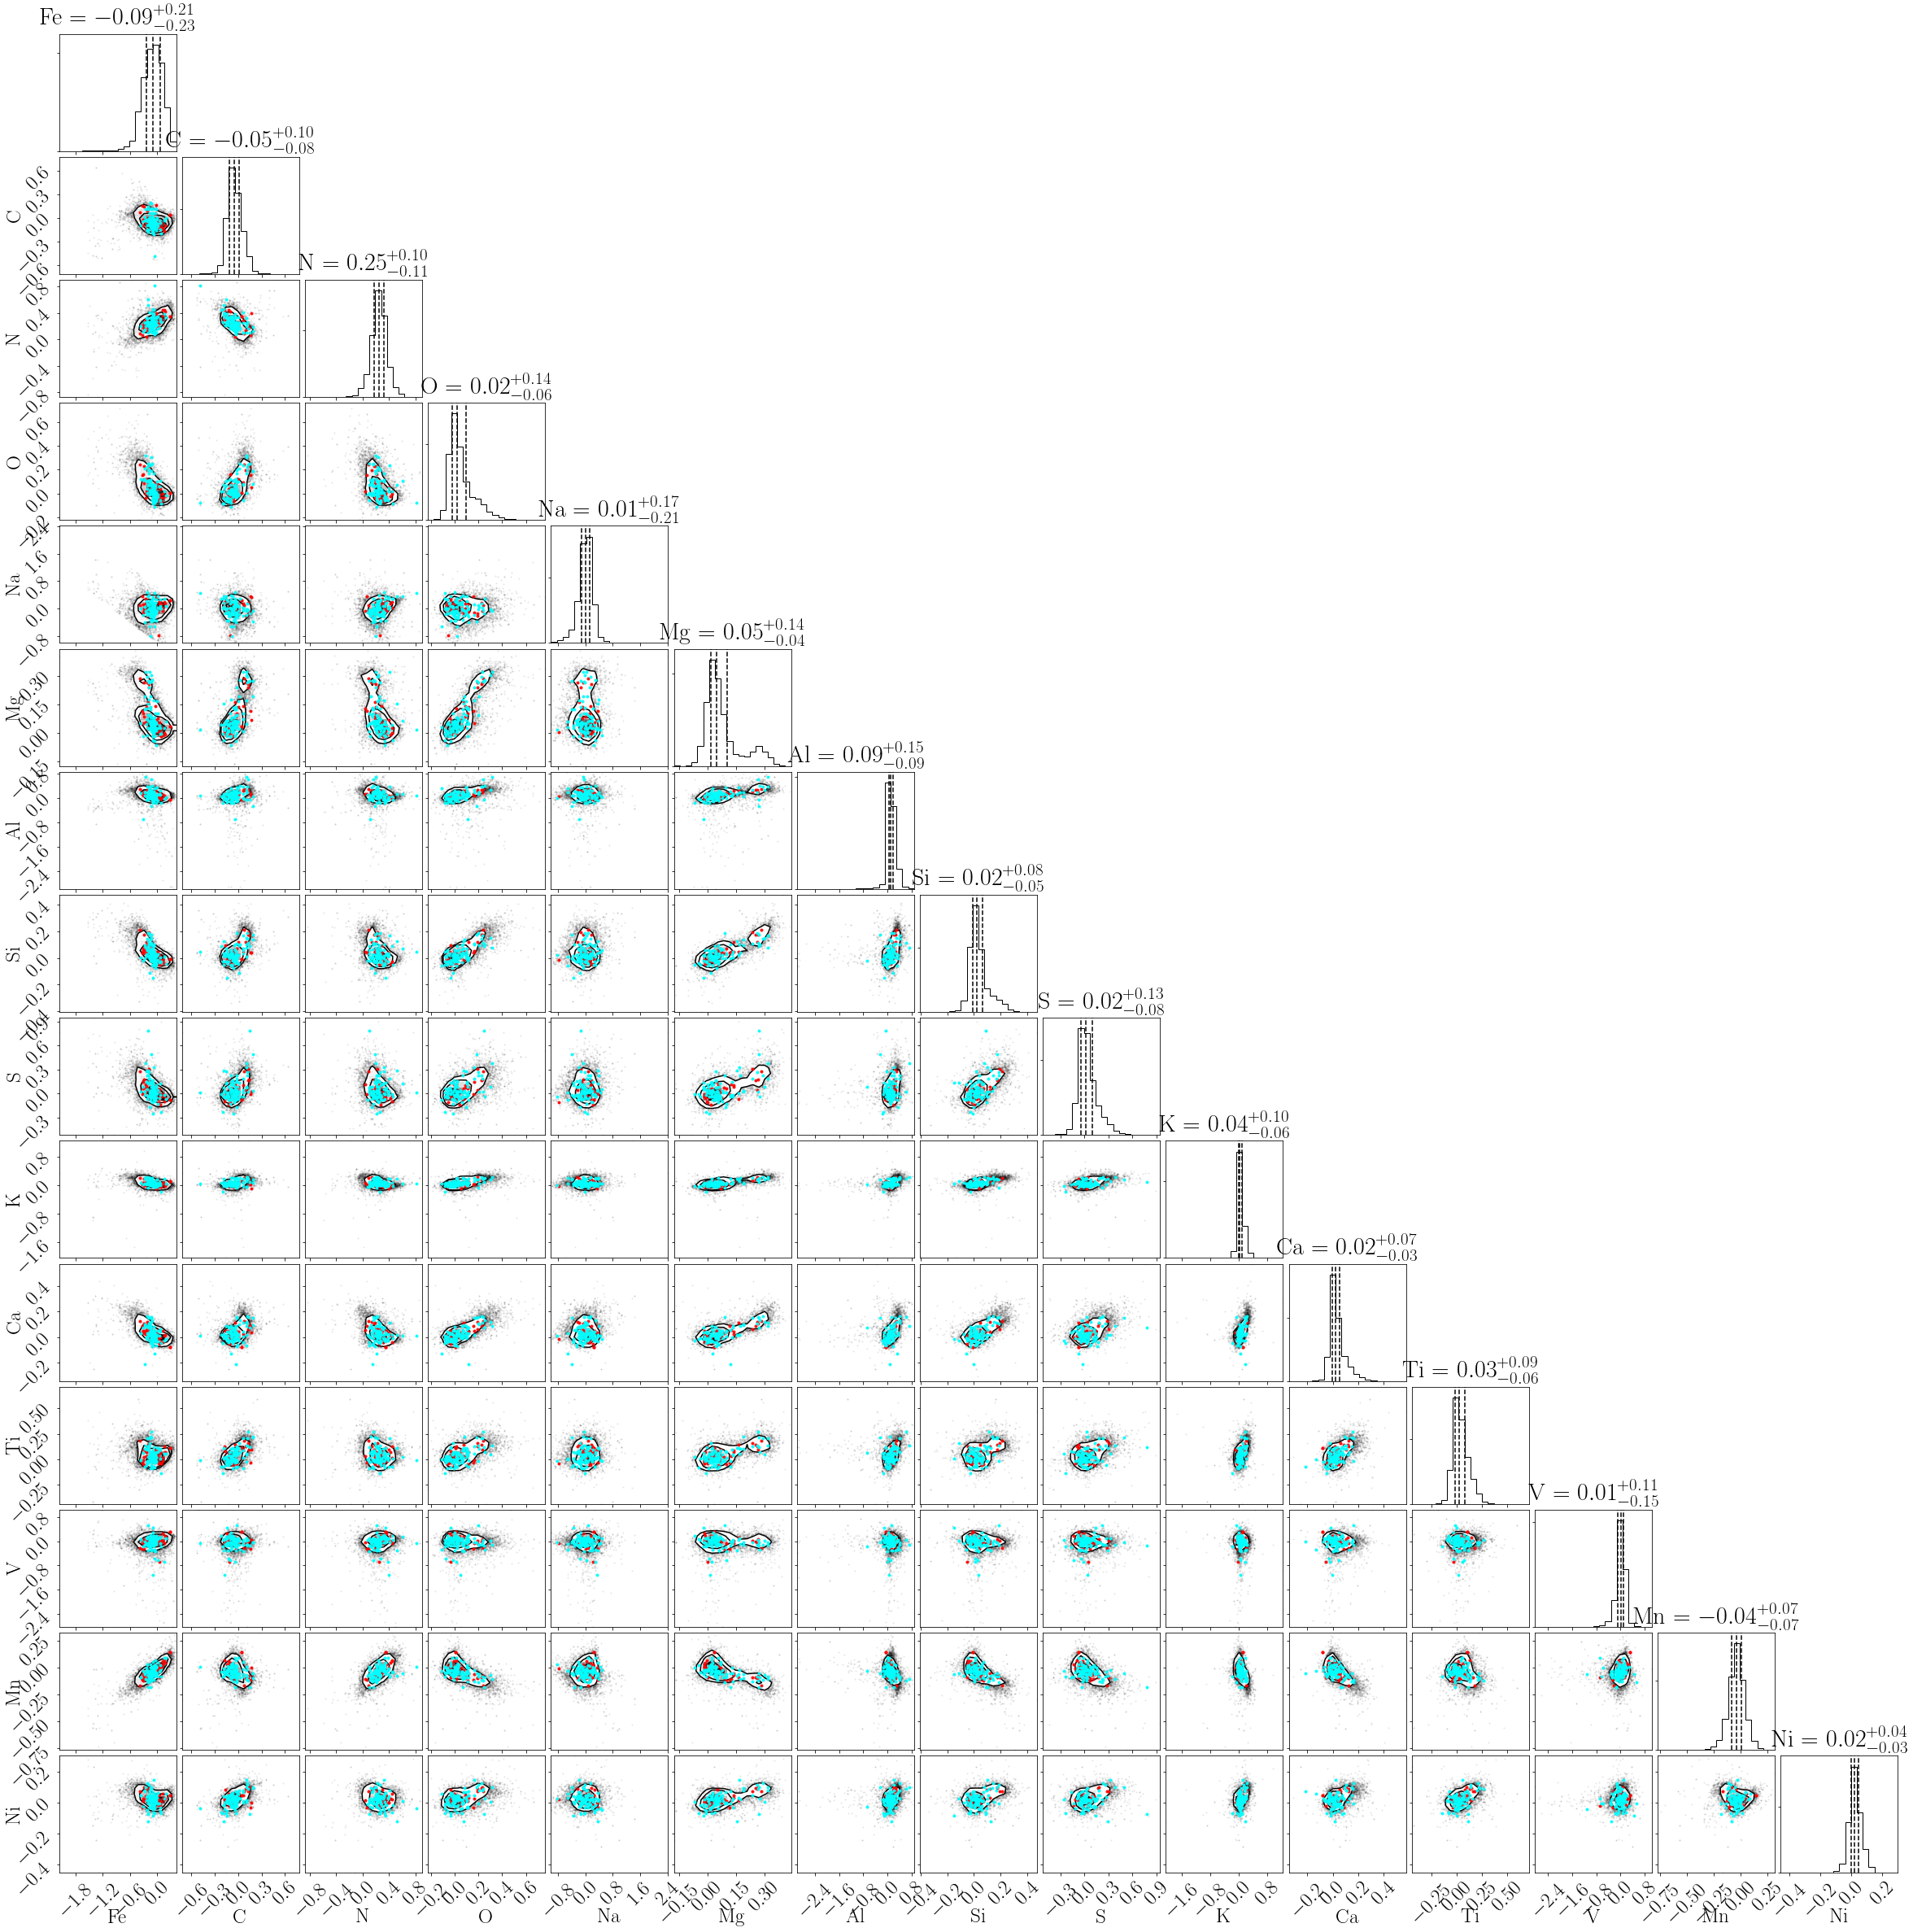

In [195]:
import corner
ndim = 15
ecut = 0.8
ccut = 0.8
sizemin = 10
nbins = 20
mask = d.tsize>sizemin
d.read_run_data(eps=0.1,min_sample=3,update=True,datatype='prin30')
success=(d.eff>=ecut)*(d.com>=ccut)*(d.fsize>sizemin)
fail = (d.eff<ecut)*(d.com<ccut)*(d.fsize>sizemin)
labs = d.matchtlabs[success]
nolabs = d.matchtlabs[fail]
fig = corner.corner(fecenters,labels = np.insert(els,0,'Fe'),quantiles=[0.25,0.5,0.75],show_titles=True,bins=nbins,hist_kwarg={'normed':True,'stacked':True,'bins':nbins})

# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.plot(fecenters[nolabs][:,xi], fecenters[nolabs][:,yi], '.',color='red',alpha=0.9)
        ax.plot(fecenters[labs][:,xi], fecenters[labs][:,yi], '.',color='cyan',alpha=0.9)
plt.savefig('master_corner.pdf')
plt.figure()

In [231]:
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = '2018-08-22.14.59.55.527448')
d.read_base_data()
print(len(d.data['labels_true']))
if not d.allbad:
    d.generate_average_stats(testnum=10,testsize=15,testeff=0.70,testcom=0.70,iters=100,minmem=15,checkcls=10,checkinds=[9807,9806,9804])

50000
spectra
abundances
reduced abundances
tophat windows
windows
10 principal components
I found 9807
Other members:  [9796 9796 9796]
I found 9807
Other members:  [9796 9796 9796]
I found 9807
Other members:  [9796 9796]
I found 9807
Other members:  [9796 9796 9796]
I found 9807
Other members:  [9803 9803]
02 principal components
05 principal components
I found 9807
Other members:  [9787 9787]
I found 9807
Other members:  [9771 9771]
20 principal components
30 principal components
I found 9807
Other members:  [9801 9801]
I found 9807
Other members:  [9796 9796]
I found 9807
Other members:  [9805 9805]
50 principal components
ting abundances
reduced ting abundances
leung abundances
reduced leung abundances


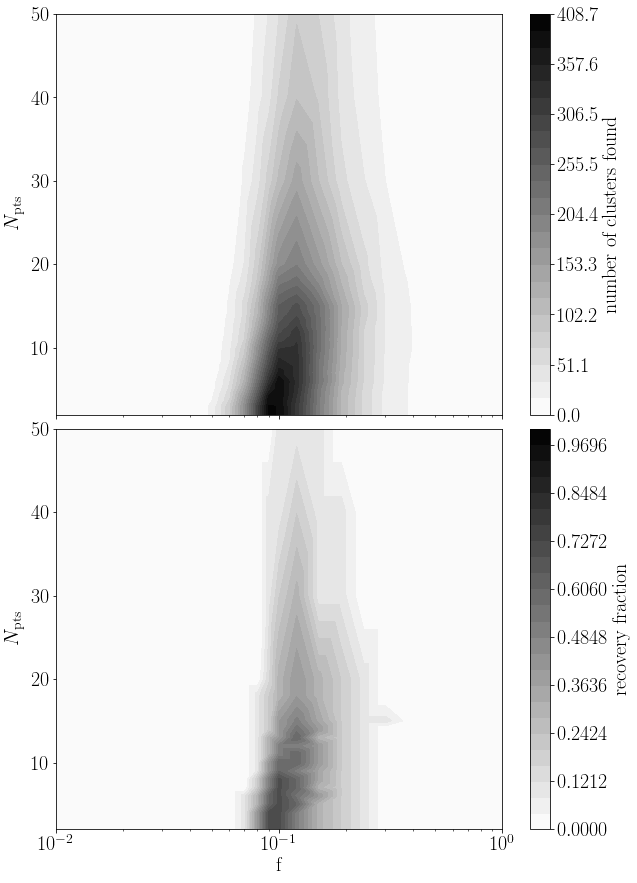

In [233]:
from matplotlib.colors import LogNorm
bins = 25
cmap = 'gray_r'
key = 'tabn'
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        #ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.tricontourf(eps,mins,ss['numc'], bins,levels=numclevels,cmap=cmap)
        fig.colorbar(cb,ax=ax1,label='number of clusters found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        #ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.tricontourf(eps,mins,ss['fstd'][:,1], bins,levels=levels,cmap=cmap)
        fig.colorbar(cb,ax=ax2,label='recovery fraction')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('f')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf')

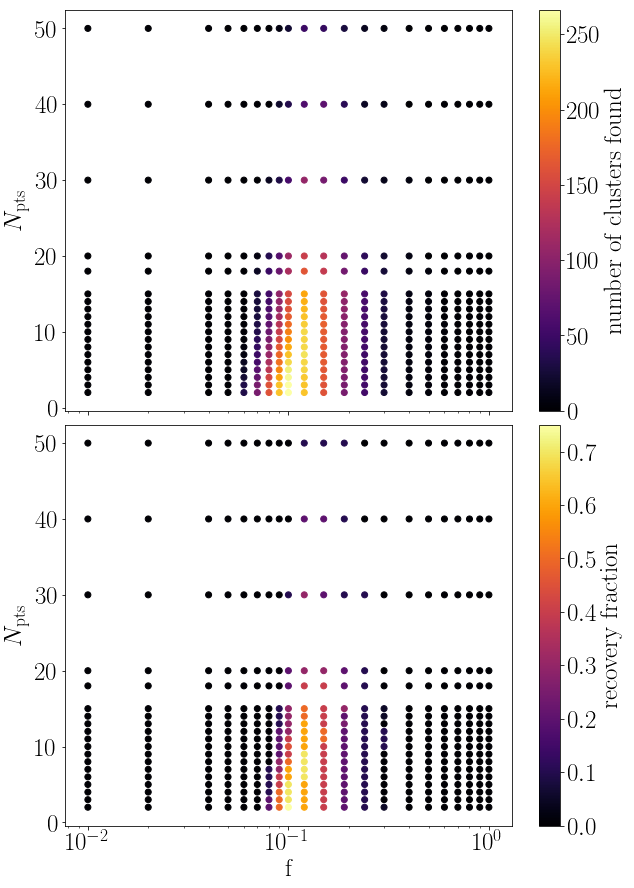

In [82]:
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        #ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.scatter(eps,mins,c=ss['numc'],cmap=cmap)
        fig.colorbar(cb,ax=ax1,label='number of clusters found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        #ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.scatter(eps,mins,c=ss['fstd'][:,1],cmap=cmap)
        fig.colorbar(cb,ax=ax2,label='recovery fraction')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('f')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf')

In [80]:
np.percentile(d.fsize,[25,50,95])

array([ 2. ,  2. , 11.6])